In [5]:
#!pip install pandas This installs Pandas
#Pandas is an open source data manipulation and analysis library for Python
import pandas as pd
#!pip install numpy This installs numpy.
#Numpy is a library used to perform mathematical operations on arrays
import numpy as np
#!pip install seaborn This installs seaborn This installs seaborn
#Seaborn is a data visualization library in Python that is built on top of Matplotlib.
import seaborn as sns
#!pip install matplotlib This installs matplotlib
#Matplotlib graphs your data on Figures, each of which can contain one or more Axes.
import matplotlib.pyplot as plt

In [6]:
# dataset used https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

In [7]:
ha = pd.read_csv('heart_attack_prediction_dataset.csv')

ha.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [8]:
print(ha.Cholesterol.describe())

count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64


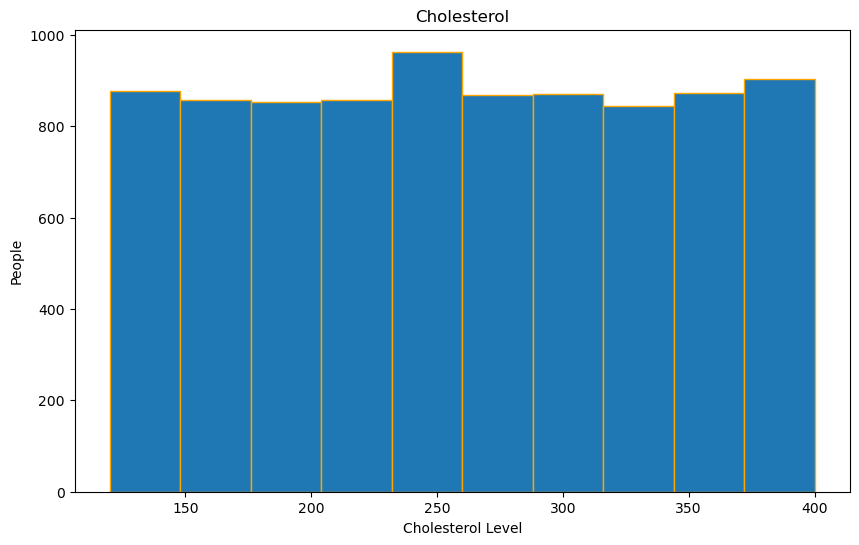

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

# This plots a histogram by using plt.hist on the subplot.
ax.hist(ha['Cholesterol'], bins=10, edgecolor='orange') 
ax.set_title('Cholesterol')
plt.xlabel("Cholesterol Level") 
plt.ylabel("People") 

plt.show()

Outliers: Series([], Name: Cholesterol, dtype: int64)


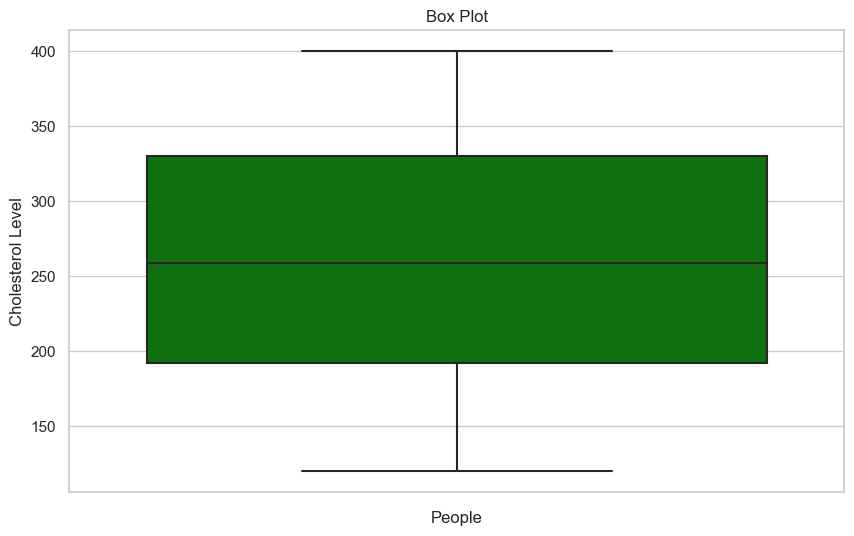

In [10]:
sns.set(style="whitegrid")

# This creates a box plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=ha['Cholesterol'], ax=ax, color='green')
ax.set_title('Box Plot')
plt.ylabel("Cholesterol Level") 
plt.xlabel("People") 

# This displays and calculates outliers using the Interquartile Range method also known as IQR
Q1 = ha['Cholesterol'].quantile(0.25)
Q3 = ha['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

outliers = ha[(ha['Cholesterol'] < Q1 - 1.5 * IQR) | (ha['Cholesterol'] > Q3 + 1.5 * IQR)]['Cholesterol']
print("Outliers:", outliers)

plt.show()

In [11]:
# People who weren't at a high risk of a heart attack.
countheartch = ha[(ha['Cholesterol'] > 259) & (ha['Heart Attack Risk'] == 0)]
hearttotalch = (len(countheartch))
print(hearttotalch)

2769


In [12]:
#People who were at a high risk of a heart attack.
countheartch1 = ha[(ha['Cholesterol'] > 259) & (ha['Heart Attack Risk'] == 1)]
hearttotalch1 = (len(countheartch1))
print(hearttotalch1)

1588


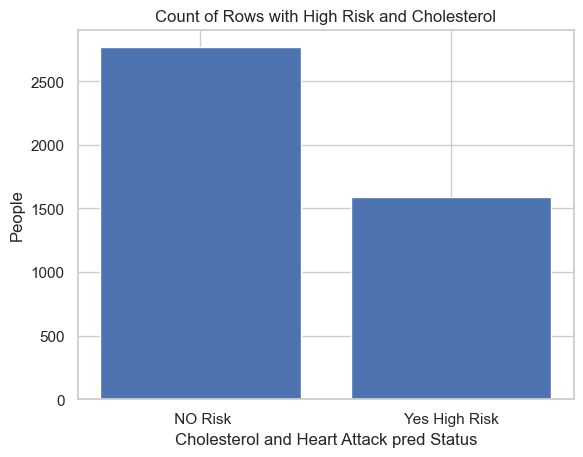

In [13]:
c = [' NO Risk', 'Yes High Risk']
d = [hearttotalch, hearttotalch1]

plt.bar(c, d)
plt.xlabel('Cholesterol and Heart Attack pred Status')
plt.ylabel('People')
plt.title('Count of Rows with High Risk and Cholesterol')
plt.show()

In [14]:
# One interesting trend is that the average cholesterol of the dataset is 259.
# 259 is considered a high number for cholesterol
# This can lead to a higher risk of a heart attack
# Surprsingly the data above showed that this isn't always the case
# In this dataset we found that people with lower cholesterol actully had a higher risk
# My belief is that this is due to some other factors like diabetes, age, smoking, etc.
#There are no outliers in the graphs above.

In [15]:
# Let's take a look at the age variable to see if my hypothesis is correct

In [16]:
print(ha.Age.describe())

count    8763.000000
mean       53.707977
std        21.249509
min        18.000000
25%        35.000000
50%        54.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64


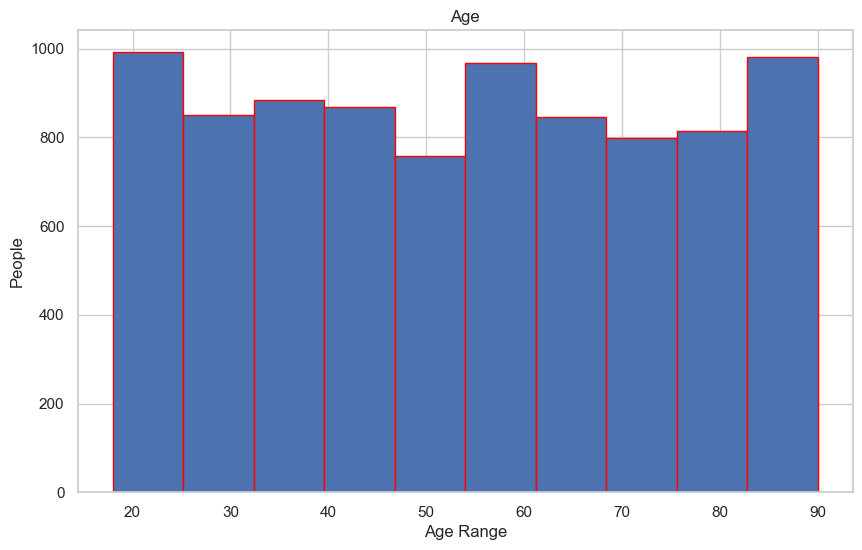

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

# This plots a histogram by using plt.hist on the subplot.
ax.hist(ha['Age'], bins=10, edgecolor='red') 
ax.set_title('Age')
plt.xlabel("Age Range") 
plt.ylabel("People") 

plt.show()

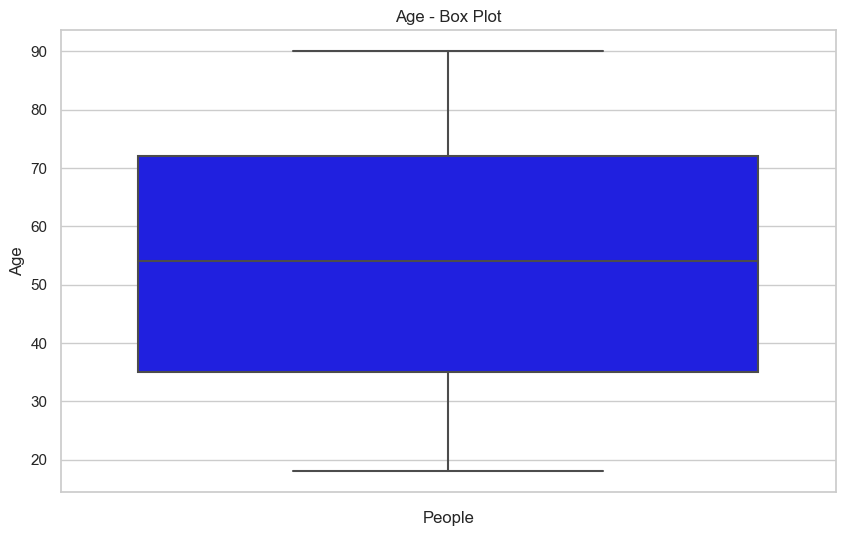

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y=ha['Age'], ax=ax, color='blue')
ax.set_title('Age - Box Plot')
plt.xlabel("People")
plt.ylabel("Age")
plt.show()

Outliers:
0


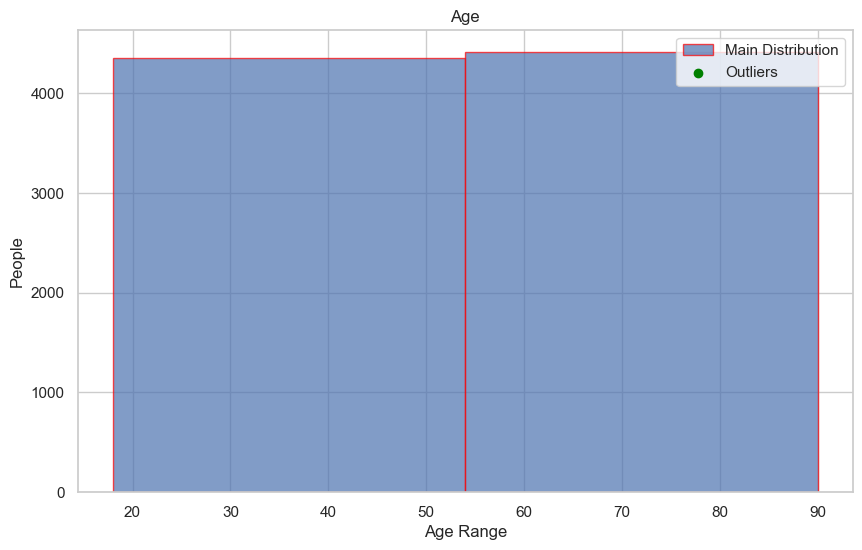

In [19]:
# This calculates outliers
q1 = ha['Age'].quantile(0.25)
q3 = ha['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ha[(ha['Age'] != 0) & ((ha['Age'] < lower_bound) | (ha['Age'] > upper_bound))]

print("Outliers:")
print(len(outliers))

#This creates a histogram
fig, ax = plt.subplots(figsize=(10, 6))

# This plots the histogram
ax.hist(ha['Age'], bins=2, edgecolor='red', alpha=0.7, label='Main Distribution')

# This places the outliers on the histogram
ax.scatter(outliers['Age'], np.zeros_like(outliers['Age']), color='green', marker='o', label='Outliers')

plt.legend()

ax.set_title('Age')
plt.xlabel("Age Range") 
plt.ylabel("People") 

plt.show()

In [20]:
# Amount of older people high risk
countheartage = ha[(ha['Age'] > 53) & (ha['Heart Attack Risk'] == 1)]
hearttotalage = (len(countheartage))
print(hearttotalage)

1583


In [21]:
# Amount of younger people high risk
countheart1age = ha[(ha['Age'] < 53) & (ha['Heart Attack Risk'] == 1)]
hearttotal1age = (len(countheart1age))
print(hearttotal1age)

1522


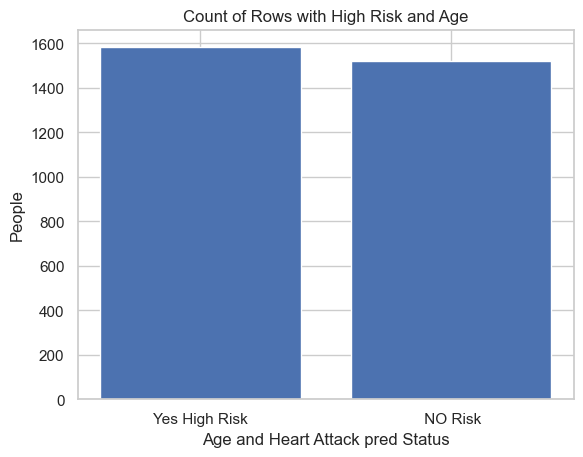

In [22]:
gr = ['Yes High Risk', ' NO Risk']
x1 = [hearttotalage, hearttotal1age]

plt.bar(gr, x1)
plt.xlabel('Age and Heart Attack pred Status')
plt.ylabel('People')
plt.title('Count of Rows with High Risk and Age')
plt.show()

In [23]:
# This showed that the older you are the higher the chance you have of getting a heart attack.

In [24]:
print(ha.Smoking.describe())

count    8763.000000
mean        0.896839
std         0.304186
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Smoking, dtype: float64


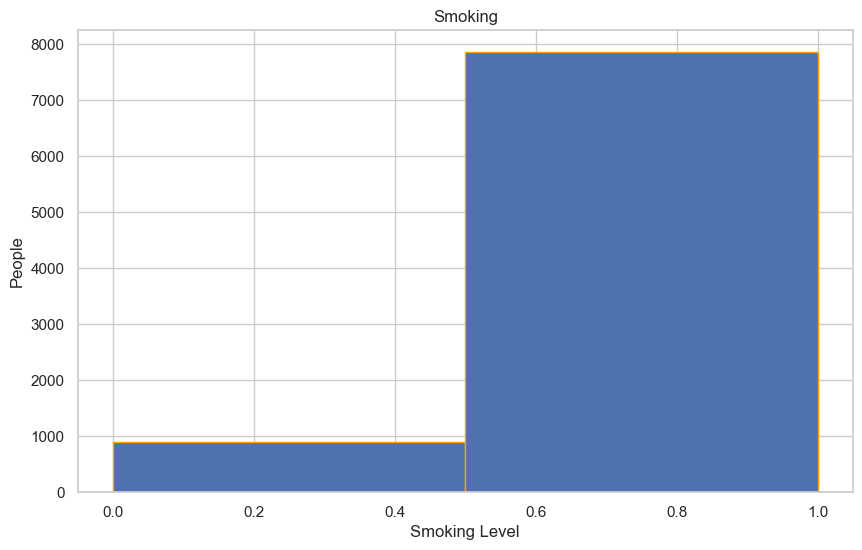

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

# This plots a histogram by using plt.hist on the subplot.
ax.hist(ha['Smoking'], bins=2, edgecolor='orange') 
ax.set_title('Smoking')
plt.xlabel("Smoking Level") 
plt.ylabel("People") 

plt.show()

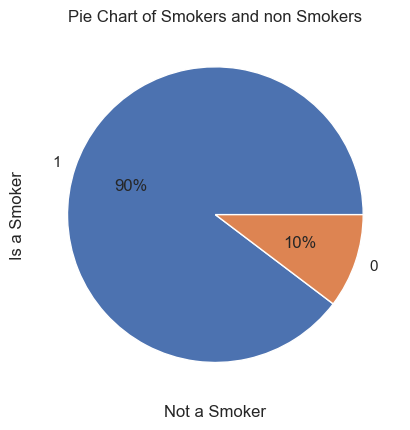

In [26]:
topSm = ha.sort_values(by=['Smoking'], ascending=False)
countSm = topSm['Smoking'].value_counts()
plt.pie(countSm, labels=countSm.index,autopct='%.0f%%')
plt.title('Pie Chart of Smokers and non Smokers')
plt.xlabel("Not a Smoker") 
plt.ylabel("Is a Smoker")
plt.show()

Outliers:
0
8763


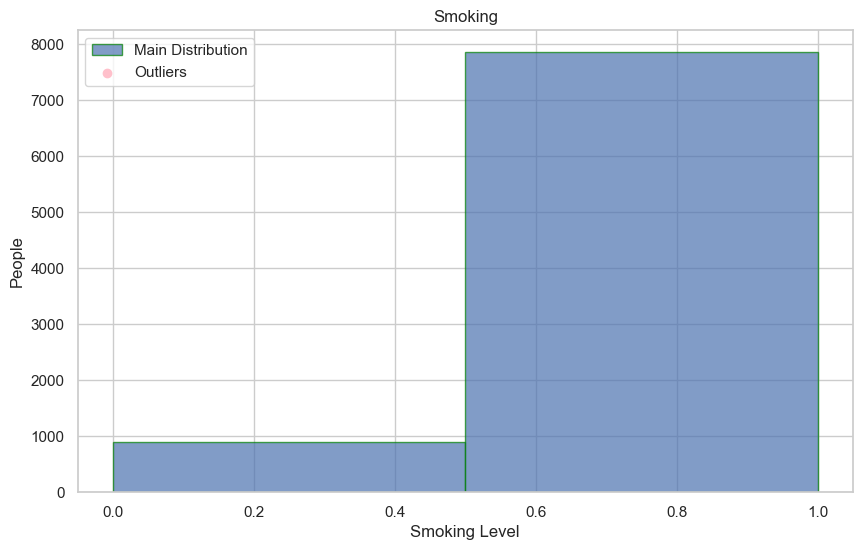

In [27]:
# This code calculates outliers
q1 = ha['Smoking'].quantile(0.25)
q3 = ha['Smoking'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ha[(ha['Smoking'] != 0) & ((ha['Smoking'] < lower_bound) | (ha['Smoking'] > upper_bound))]

print("Outliers:")
print(len(outliers))
print(len(ha['Smoking']))

# This creates the histogram
fig, ax = plt.subplots(figsize=(10, 6))

# This plots the histogram
ax.hist(ha['Smoking'], bins=2, edgecolor='green', alpha=0.7, label='Main Distribution')

# This places the outliers on the histogram
ax.scatter(outliers['Smoking'], np.zeros_like(outliers['Smoking']), color='pink', marker='o', label='Outliers')

# Add legend
plt.legend()

# Set title and labels
ax.set_title('Smoking')
plt.xlabel("Smoking Level") 
plt.ylabel("People") 

# Show the plot
plt.show()

In [28]:
countheartsm = ha[(ha['Smoking'] == 0) & (ha['Heart Attack Risk'] == 1)]
hearttotalsm = (len(countheartsm))
print(hearttotalsm)

329


In [29]:
countheart1sm = ha[(ha['Smoking'] == 1) & (ha['Heart Attack Risk'] == 1)]
hearttotal1sm = (len(countheart1sm))
print(hearttotal1sm)

2810


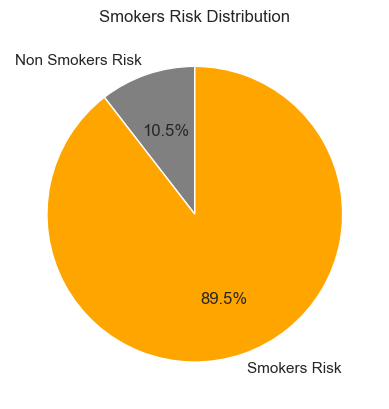

In [30]:
labels = ['Non Smokers Risk', 'Smokers Risk']
sizes = [hearttotalsm, hearttotal1sm]

# This creates a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['gray', 'orange'])

plt.title('Smokers Risk Distribution')
plt.show()

In [31]:
# When you compare Smokers to non smokers we find
# 89.5 percent are more likely to have a heart attack than non smokers.

In [32]:
print(ha.Diabetes.describe())

count    8763.000000
mean        0.652288
std         0.476271
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Diabetes, dtype: float64


In [33]:
# Amount of people with diabetes at risk
wd = ha[ha['Diabetes'] == 1]
totalwd = len(wd['Diabetes'])
print(totalwd)

5716


In [34]:
# Amount of people who don't have diabetes at risk
nod = ha[ha['Diabetes'] == 0]
totalnod = len(nod['Diabetes'])
print(totalnoDb)

NameError: name 'totalnoDb' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram on the subplot using plt.hist
ax.hist(ha['Diabetes'], bins=2, edgecolor='yellow') 
ax.set_title('Diabetes')
plt.xlabel("(No OR YES)") 
plt.ylabel("People") 

plt.show()

In [ ]:
top2 = ha.sort_values(by=['Diabetes'], ascending=False)
count2 = top2['Diabetes'].value_counts()
plt.pie(count2, labels=count2.index,autopct='%.0f%%')
plt.title('Pie Chart of Diabetes')
plt.xlabel("No Diabetes") 
plt.ylabel("Has Diabetes")
plt.show()

In [ ]:
# Diabetes has always been linked with an increase in heart attacks and
# we can use this data to confirm it

In [ ]:
# This creates a DataFrame with a column named 'Heart Attack Risk'
Heart_Attack_Risk = pd.DataFrame({'Heart Attack Risk': ha['Heart Attack Risk']})

# This allows us to evaluate the column
print(Heart_Attack_Risk['Heart Attack Risk'].describe())

In [ ]:
yh = ha[ha['Heart Attack Risk'] == 1]
totalyh = len(yh['Heart Attack Risk'])
print(totalyh)

In [ ]:
nh = ha[ha['Heart Attack Risk'] == 0]
totalnh = len(nh['Heart Attack Risk'])
print(totalnh)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(ha['Heart Attack Risk'], bins=2, edgecolor='pink') 
ax.set_title('Heart Attack Risk')
plt.xlabel("(No OR YES)") 
plt.ylabel("People") 

plt.show()

In [ ]:
topha = ha.sort_values(by=['Heart Attack Risk'], ascending=False)
countha = topha['Heart Attack Risk'].value_counts()
plt.pie(countha, labels=countha.index,autopct='%.0f%%')
plt.title('Pie Chart of Heart Attack Risk')
plt.xlabel("Has Heart Attack Risk")
plt.ylabel("No Heart Attack Risk") 
plt.show()

In [ ]:
yd = ha[ha['Diabetes'] == 1 & (ha['Heart Attack Risk'] == 1)]
totalyd = len(yd['Diabetes'])
print(totalyd)

In [ ]:
nd = ha[ha['Diabetes'] == 0 & (ha['Heart Attack Risk'] == 1)]
total1nd = len(nd['Diabetes'])
print(total1nd)

In [ ]:
group = ['Yes Diabetes', ' NO Diabetes']
x = [totalyd, total1nd]

plt.bar(group, x)
plt.xlabel('Diabetes and Heart Attack Status')
plt.ylabel('People')
plt.title('Count of Rows with Heart Attack Risk and Diabetes')
plt.show()

In [ ]:
# We find that people with diabetes do have a higher chance of getting a heart attack than people who don't.

In [ ]:
# Let's look at Cholesterol and Income
# I believe they have a strong connection because
# People who have a higher Income tend to have lower choleseterol
# I believe this is true because with a higher income you can afford healthier food.

In [ ]:
# This code groups the data in a dataFrame based on Cholesterol
# then computes summary statistics for the Income column.

grouped_data = ha.groupby(pd.cut(ha['Cholesterol'], bins=5))
summary_stats = grouped_data['Income'].describe()

print(summary_stats)

In [ ]:
x = ha['Cholesterol']
y = ha['Income']
sns.set_palette = ('plasma')

# This creates a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, hue=x, palette = 'plasma')
plt.title('Scatter Plot of Cholesterol vs Income')
plt.xlabel('Cholesterol')
plt.ylabel('Income')
plt.show()

# Correlation coefficient
correlation = x.corr(y)
print(f"Correlation coefficient: {correlation}")

In [ ]:
ha['Income'].describe()

In [ ]:
countheartcho = ha[(ha['Cholesterol'] > 259) & (ha['Income'] > 158263)]
hearttotalcho = (len(countheartcho))
print(hearttotalcho)

In [ ]:
countheartcho1 = ha[(ha['Cholesterol'] > 259) & (ha['Income'] < 158263)]
hearttotalcho1 = (len(countheartcho1))
print(hearttotalcho1)

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(countheartcho['Income'], countheartcho['Cholesterol'], label='Income > 158263')

plt.scatter(countheartcho1['Income'], countheartcho1['Cholesterol'], label='Income < 158263')

plt.xlabel('Income')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot of Income vs Cholesterol')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# They are statistically significant because there is a strong relation between the two.

In [ ]:
# The higher the income the lower your cholesterol.

In [ ]:
# Heart Rate Numerical and Diabetes categorical
#I believe they have a strong connection because
# diabetes tends to have a negative impact on the heart

In [ ]:
# No diabetes and low heart rate
count = ha[(ha['Heart Rate'] < 85) & (ha['Diabetes'] == 0)]
total2 = len(count)
print(total2)

In [ ]:
# #Has diabetes and low heart rate
count1 = ha[(ha['Heart Rate'] < 85) & (ha['Diabetes'] == 1)]
total30 = len(count1)
print(total30)

In [ ]:
# High heart rate and no diabetes
count2 = ha[(ha['Heart Rate'] > 85) & (ha['Diabetes'] == 0)]
total4 = len(count2)
print(total4)

In [ ]:
#Has diabetes and high heart rate
count3 = ha[(ha['Heart Rate'] > 85) & (ha['Diabetes'] == 1)]
total5 = len(count3)
print(total5)

In [ ]:
top = ['No Diabetes', 'Diabetes']
ct = [total2, total30]

plt.bar(top, ct)
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Count of Rows with Heart Rate < 85')
plt.show()

In [ ]:
top = ['No Diabetes', 'Diabetes']
ct = [total4, total5]

plt.bar(top, ct)
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Count of Rows with Heart Rate > 85')
plt.show()

In [ ]:
#This proves that people who have diabetes have a higher heart rate than people who don't and
# that diabetes does indeed have a negative impact on the heart.

In [ ]:
# In the last two graphs I combine all 4 counts to make it easier to analyze.

In [ ]:
info = [total2, total30, total4, total5]

plt.bar(range(len(info)), [i for i in info], tick_label=['Low HR No DB', 'Low HR Has DB', 'High HR No DB', 'High HR Has DB'])
plt.title('Heart Rate VS Diabetes Bar Chart')
plt.show()

In [ ]:
plt.pie([i for i in info], labels=['Low HR No DB', 'Low HR Has DB', 'High HR No DB', 'High HR Has D'], autopct='%1.1f%%')
plt.title('Heart Rate VS Diabetes Pie Chart')
plt.show()

In [ ]:
# I prepared and anzlyzed this data in a way so that people can see what factors lead to a heart attack.
# A lot of the information gained from this project is pretty muh what you would expect when 
# it comes to lowering your risk of having a heart attack.

#This project provides many valuable insights on what increases your risk of a heart attack.
# The older you are the more vulnerable you are to having a heart attack.
# This is why it is important to take care of yourself and do basic things for example
# Stop smoking, lower your cholesterol, eat less sugar so that you can avoid diabetes.